In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm

acs_15_commute_byage_usa = pd.read_csv(r'datasets/ACS_15_5YR_B08101-2/ACS_15_5YR_B08101_with_ann.csv',
                                       header=0,sep=",")

In [2]:
ages1619 = ['HD01_VD03','HD01_VD11','HD01_VD19','HD01_VD27','HD01_VD35','HD01_VD43','HD01_VD51']
commute_1619 = acs_15_commute_byage_usa.loc[:,ages1619].T
commute_1619 = commute_1619.rename_axis({'HD01_VD03':"Total",'HD01_VD11':"Car,alone",'HD01_VD19':"Car,carpool",'HD01_VD27':"Public transport",'HD01_VD35':"Walked",'HD01_VD43':"Other",'HD01_VD51':"Home"})
commute_1619 = commute_1619.rename_axis({0:"16-19"},axis="columns")

ages2024 = ['HD01_VD04','HD01_VD12','HD01_VD20','HD01_VD28','HD01_VD36','HD01_VD44','HD01_VD52']
commute_2024 = acs_15_commute_byage_usa.loc[:,ages2024].T
commute_2024 = commute_2024.rename_axis({'HD01_VD04':"Total",'HD01_VD12':"Car,alone",'HD01_VD20':"Car,carpool",'HD01_VD28':"Public transport",'HD01_VD36':"Walked",'HD01_VD44':"Other",'HD01_VD52':"Home"})
commute_2024 = commute_2024.rename_axis({0:"20-24"},axis="columns")

ages2544 = ['HD01_VD05','HD01_VD13','HD01_VD21','HD01_VD29','HD01_VD37','HD01_VD45','HD01_VD53']
commute_2544 = acs_15_commute_byage_usa.loc[:,ages2544].T
commute_2544 = commute_2544.rename_axis({'HD01_VD05':"Total",'HD01_VD13':"Car,alone",'HD01_VD21':"Car,carpool",'HD01_VD29':"Public transport",'HD01_VD37':"Walked",'HD01_VD45':"Other",'HD01_VD53':"Home"})
commute_2544 = commute_2544.rename_axis({0:'25-44'},axis="columns")

ages4554 = ['HD01_VD06','HD01_VD14','HD01_VD22','HD01_VD30','HD01_VD38','HD01_VD46','HD01_VD54']
commute_4554 = acs_15_commute_byage_usa.loc[:,ages4554].T
commute_4554 = commute_4554.rename_axis({'HD01_VD06':"Total",'HD01_VD14':"Car,alone",'HD01_VD22':"Car,carpool",'HD01_VD30':"Public transport",'HD01_VD38':"Walked",'HD01_VD46':"Other",'HD01_VD54':"Home"})
commute_4554 = commute_4554.rename_axis({0:'45-54'},axis="columns")

ages5559 = ['HD01_VD07','HD01_VD15','HD01_VD23','HD01_VD31','HD01_VD39','HD01_VD47','HD01_VD55']
commute_5559 = acs_15_commute_byage_usa.loc[:,ages5559].T
commute_5559 = commute_5559.rename_axis({'HD01_VD07':"Total",'HD01_VD15':"Car,alone",'HD01_VD23':"Car,carpool",'HD01_VD31':"Public transport",'HD01_VD39':"Walked",'HD01_VD47':"Other",'HD01_VD55':"Home"})
commute_5559 = commute_5559.rename_axis({0:'55-59'},axis="columns")

ages6064 = ['HD01_VD08','HD01_VD16','HD01_VD24','HD01_VD32','HD01_VD40','HD01_VD48','HD01_VD56']
commute_6064 = acs_15_commute_byage_usa.loc[:,ages6064].T
commute_6064 = commute_6064.rename_axis({'HD01_VD08':"Total",'HD01_VD16':"Car,alone",'HD01_VD24':"Car,carpool",'HD01_VD32':"Public transport",'HD01_VD40':"Walked",'HD01_VD48':"Other",'HD01_VD56':"Home"})
commute_6064 = commute_6064.rename_axis({0:'60-64'},axis="columns")

ages65up = ['HD01_VD09','HD01_VD17','HD01_VD25','HD01_VD33','HD01_VD41','HD01_VD49','HD01_VD57']
commute_65up = acs_15_commute_byage_usa.loc[:,ages65up].T
commute_65up = commute_65up.rename_axis({'HD01_VD09':"Total",'HD01_VD17':"Car,alone",'HD01_VD25':"Car,carpool",'HD01_VD33':"Public transport",'HD01_VD41':"Walked",'HD01_VD49':"Other",'HD01_VD57':"Home"})
commute_65up = commute_65up.rename_axis({0:'65+'},axis="columns")

merged = pd.merge(commute_1619,commute_2024,left_index=True,right_index=True)
merged = pd.merge(merged,commute_2544,left_index=True,right_index=True)
merged = pd.merge(merged,commute_4554,left_index=True,right_index=True)
merged = pd.merge(merged,commute_5559,left_index=True,right_index=True)
merged = pd.merge(merged,commute_6064,left_index=True,right_index=True)
merged = pd.merge(merged,commute_65up,left_index=True,right_index=True)

merged = merged.T

In [3]:
for column in [column for column in merged.columns if column!="Total"]:
    merged[column] = merged[column]/merged["Total"]*100

merged = merged.drop("Total",axis="columns")

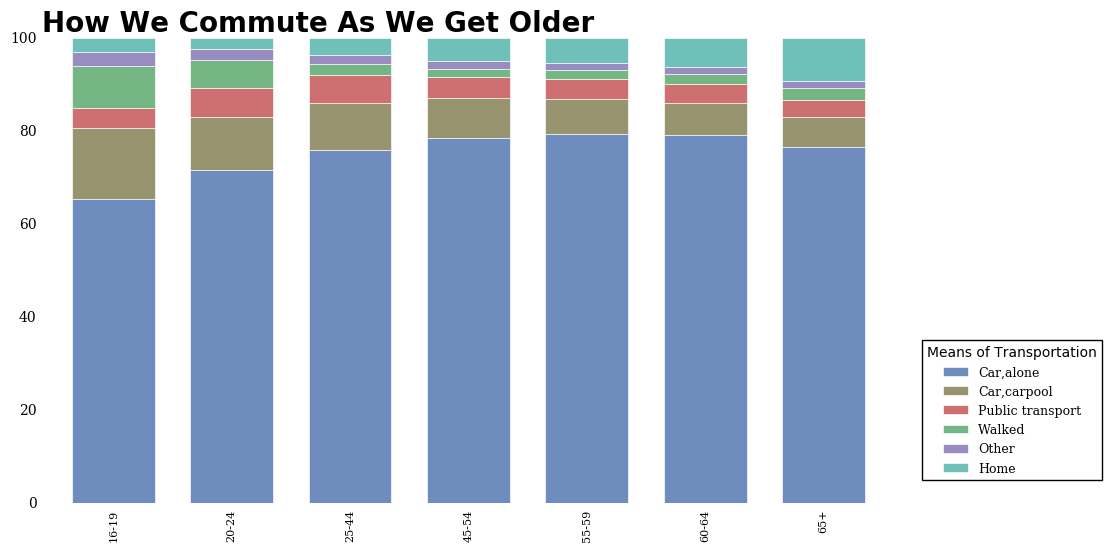

In [4]:
colors = ['#5e80b7','#8C895F','#c95f63','#66b077','#8d80b9','#5EB9B2'] #8C6963 #C97BB1 #B99160 #8BC969

ax = merged.plot(y=[column for column in merged.columns],kind="bar",stacked=True,legend=False,figsize=(11,6),
                 ylim=(0,100), color=colors, width=0.7, edgecolor="#FFFFFF",lw=0.5, alpha=0.9)

ax.legend(loc='center left', title="Means of Transportation", bbox_to_anchor=(1.025, 0.2), prop={"family":"serif", "size":9})
ax.grid(linewidth=0)

for item in ax.get_xticklabels():
#     item.set_rotation(60)
#     item.set_horizontalalignment('center')
    item.set_size(8)
    item.set_family("serif")
    
for item in ax.get_yticklabels():
    item.set_family("serif")

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.set_axis_bgcolor('white')

spines_to_remove = ['top', 'right','left','bottom']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
plt.title("How We Commute As We Get Older",loc="left", 
          fontdict={"fontsize":20, "fontweight":"bold"})